# Study of ads for the sale of apartments

At your disposal is the data of the Yandex.Realty service - an archive of ads for the sale of apartments in St. Petersburg and neighboring settlements for several years. You need to learn how to determine the market value of real estate. Your job is to set the parameters. This will allow to build an automated system: it will track anomalies and fraudulent activity.

Two types of data are available for each apartment for sale. The first ones are entered by the user, the second ones are obtained automatically on the basis of cartographic data. For example, the distance to the center, airport, nearest park and reservoir.

The purpose of the study is to study the cost of housing depending on various factors:
- total area, living area and kitchen area, number of rooms, floors, etc.
- day, month and year of the announcement
- cartographic location of the property

Research progress:
- get data from csv file
- we will pre-process the data, remove explicit and implicit duplicates, remove or change suspicious and frankly strange data
- we will conduct research on the dependence of the cost of housing on various factors

### Open the data file and study the general information.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,...,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,...,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,...,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,...,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,...,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


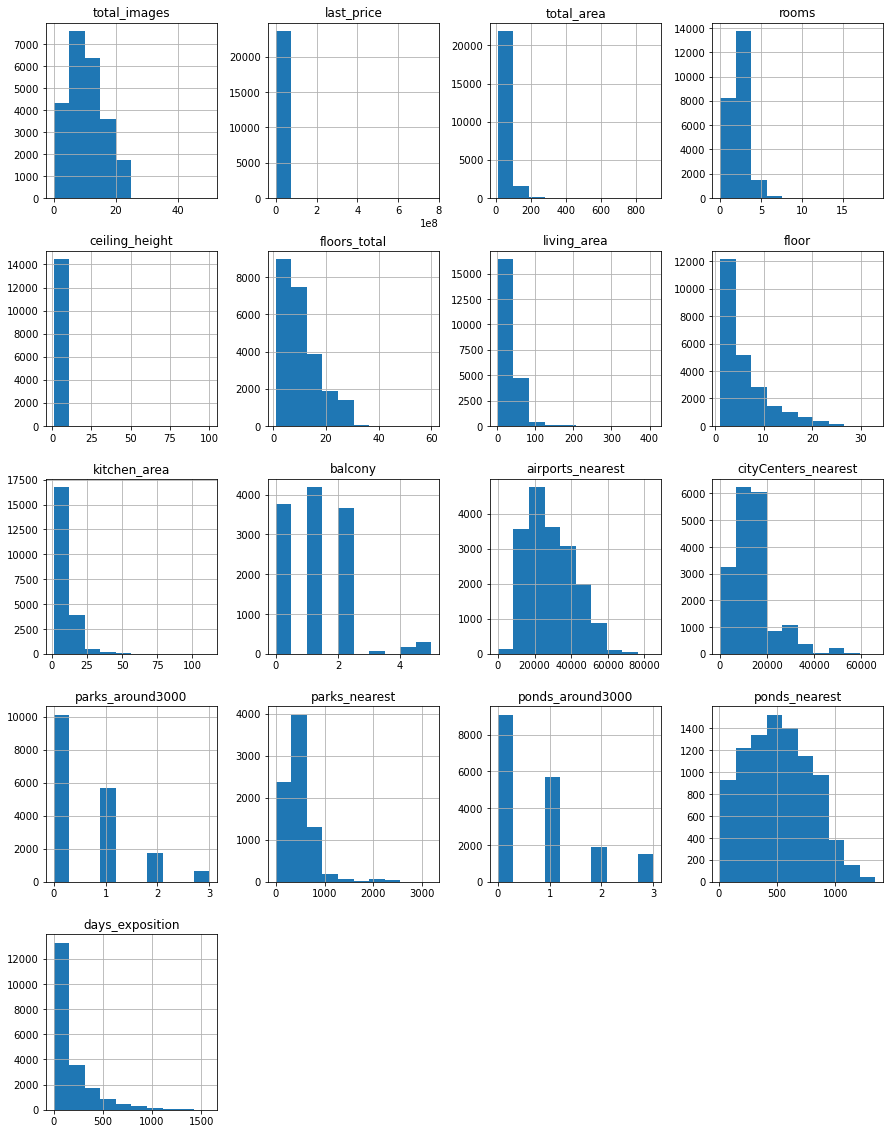

In [96]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
data = pd.read_csv('real_estate_data.csv', sep='\t' , decimal='.')
data.info(10)
data.hist(figsize=(15, 20))
data.head(10)


### Data processing

According to the information from the dataframe, we can see the following:

0. total_images - looks correct
1. last_price - looks correct, there is an extremely high value
2. total_area - looks correct, there are extremely high values
3. first_day_exposition - type object, but must be type explicitly datetime, must be changed
4. rooms - looks correct
5. ceiling_height - there are data gaps
6. floors_total - must be of type int, because the number of floors is an integer value, and there are data gaps
7. living_area - there are data gaps
8. floor - looks correct
9. is_apartment - must be bool type, some values ​​are also missing
10. studio - looks correct
11. open_plan - looks correct
12. kitchen_area - there are data gaps
13. balcony - must be int, there are gaps in the data, most likely in this case there is simply no balcony, it is possible that they forgot to add it, but we will not know this in any way, so we consider the zero value as the absence of a balcony.
14. locality_name - there are data gaps, but there are very few of them, since this is an object, it makes no sense to fix it.
15. airports_nearest - there are gaps in the data, we consider that in this case there is no airport nearby.
16. cityCenters_nearest - there are data gaps, should be replaced with the median value.
17. parks_around3000 - type must be int, there are data gaps, in this case we assume that there are no parks at a distance of 3 km from the apartment.
18. parks_nearest - there are gaps in the data, we believe that in this case there are no parks nearby, since this is quite possible.
19. ponds_around3000 - type must be int, there are gaps in data, we assume that there are no ponds at a distance of 3 km from the apartment.
20. ponds_nearest - there are gaps in data, we assume that in this case there are no ponds nearby.
21. days_exposition - the type must be int, there are data gaps, there are not so many gaps, and there is nothing to replace them with.

The names of the columns are specified correctly, in "serpentine" case without Cyrillic characters and in one case, we will not change them.
Need to check columns: 3, 5, 6, 7, 9, 12, 13, 14, 16, 17, 18, 19, 20, 21

#### Convert the column with the date of the first exposure to the date format without time

In [97]:
# 3.translate the column with the date of the first exposure into a date format without time, 
#because time is not important in this case.
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format = '%Y-%m-%d')
data['first_day_exposition']

0       2019-03-07
1       2018-12-04
2       2015-08-20
3       2015-07-24
4       2018-06-19
           ...    
23694   2017-03-21
23695   2018-01-15
23696   2018-02-11
23697   2017-03-28
23698   2017-07-21
Name: first_day_exposition, Length: 23699, dtype: datetime64[ns]

#### Consider the ceiling_height column

<AxesSubplot:ylabel='Frequency'>

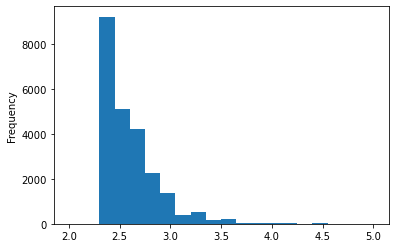

In [98]:
# 5. consider the ceiling_height column
data['ceiling_height'].value_counts()
# first remove NaN, replace them with 0
data['ceiling_height'] = data['ceiling_height'].fillna(0)

# the minimum ceiling height in Russia is 2.4 meters (since Khrushchev), and the maximum height in St. Petersburg
# is (according to Google) more than 5 meters (in some old houses in the area of St. Isaac's Cathedral),
# so I decided to put a ceiling range of 2.4 - 6 meters

# A ceiling height of more than 24 meters hints to us that these values are clearly missing decimal places,
# so all values above 24 meters are divided by 10 to make those values valid.
data.loc[data['ceiling_height'] >= 24, 'ceiling_height'] = data.loc[data['ceiling_height'] >= 24, 'ceiling_height']/10

# remove remaining values above 6 meters
data = data.drop(data[data['ceiling_height'] > 6].index)

# replace values below 2.4 meters. Considering that we took the minimum ceiling height as 2.4 meters, and also that
# in our data there are ceilings of 0 meters, then I decided to add the same 2.4 meters to all ceilings below 2.4.
# Thus, all strange values will be distributed evenly over the sample.
data.loc[data['ceiling_height'] < 2.4, 'ceiling_height'] = data.loc[data['ceiling_height'] < 2.4, 'ceiling_height'] + 2.4

# check the distribution of values:
data['ceiling_height'].sort_values().plot(y = 'ceiling_height', kind = 'hist', bins = 20, range=(2,5))
# this way we've reduced all ceiling heights to values between 2.4 and 6 meters


In [99]:
for locality_name in data['locality_name'].unique():
    median = data.loc[data['locality_name'] == locality_name,'ceiling_height'].median()
    data.loc[(data['ceiling_height'].isna()) & (data['locality_name'] == locality_name), 'ceiling_height'] = median

# all that is not filled in is filled with a common median for Leningrad area (121 gaps will be replaced by the median)
data.loc[data['ceiling_height'].isna(), 'ceiling_height'] = data['ceiling_height'].median()
data['cityCenters_nearest'].isna().sum()

5518

#### Consider the floors_total column

In [100]:
# 6. in the floors_total column, change the value type to int
# and change NaN to 0
data['floors_total'] = data['floors_total'].fillna(0).astype('int')

# you need to delete lines with zeros, since there can be no house without floors.
data = data.drop(data[data['floors_total'] == 0].index)
data['floors_total'].unique()

array([16, 11,  5, 14, 12, 26, 24, 27,  9,  6, 17, 25,  3, 23, 19, 18,  4,
       22,  8,  2, 10,  7, 13, 15, 20, 28, 36, 21, 35, 34, 60,  1, 29, 33,
       52, 37])

#### Consider the living_area column

<AxesSubplot:ylabel='Frequency'>

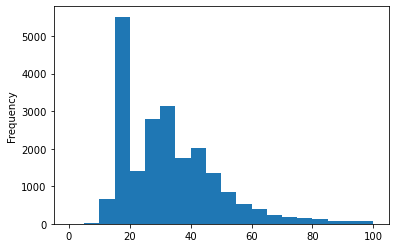

In [101]:
# 7. there are missing values in the living_area column, they
# we will turn to 0 and delete it, since the living area cannot be 0 meters, 
#and this is an important indicator of the cost of the apartment.
data['living_area'] = data['living_area'].fillna(0)
data = data.drop(data[data['living_area'] == 0].index)

data['living_area'].sort_values().plot(y = 'living_area', kind = 'hist', bins = 20, range=(0,100))
# no more 0 m2 apartments

#### Consider the is_apartment column

In [102]:
# 9. in the is_apartment column, all missing values will be replaced with False, since presumably this is not an apartment,
# unless otherwise noted
data['is_apartment'] = data['is_apartment'].fillna(False)

#### Consider the column kitchen_area

<AxesSubplot:ylabel='Frequency'>

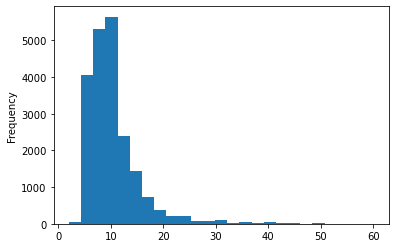

In [103]:
# 12. consider the kitchen_area column
data['kitchen_area'].value_counts()
data['kitchen_area'].sort_values().plot(y = 'kitchen_area', kind = 'hist', bins = 25, range=(2,60))
# it contains (except for missing values) values above 30m, which is possible in principle,
# A kitchen of 7 m2 may well exist.

2.7 Consider the balcony column

In [104]:
# 13. replace gaps in the balcony with 0 and change the data type to int, since the number of balconies cannot be fractional
data['balcony'] = data['balcony'].fillna(0).astype('int')

#### Consider the locality_name column

In [105]:
# 14. The locality_name column may contain similar names, we need to remove them.
# for this NaN value, we will replace it with 'not specified' (we will delete these values later) and first create a list with types of settlements based on unique
# column values (let's convert everything to lower case first, to get rid of case errors).
data['locality_name'] = data['locality_name'].str.lower()
data['locality_name'] = data['locality_name'].fillna('not specified')
data = data.drop(data[data['locality_name'] == 'not specified'].index)
data['locality_name'].unique()

names_list = ['город', 'деревня', 'городок', 'садовая ассоциация', 'деревня',
'поселок городского типа', 'посёлок городского типа', 'коттеджный поселок', 'коттеджный посёлок',
'садоводческое некоммерческое товарищество', 'привокзальный поселок', 'привокзальный посёлок', 'посёлок городского типа',
'городской поселок', 'садовое товарищество', 'посёлок',
'поселок', 'городской тип', 'село']
# I had to add a lot of different options to the list, since they were all viewed when
# another check for unique values, respectively, I updated the list every time
# finding such a value in unique.
# now sort the list alphabetically for convenience
names_list = sorted(names_list)
names_list

['город',
 'городок',
 'городской поселок',
 'городской тип',
 'деревня',
 'деревня',
 'коттеджный поселок',
 'коттеджный посёлок',
 'поселок',
 'поселок городского типа',
 'посёлок',
 'посёлок городского типа',
 'посёлок городского типа',
 'привокзальный поселок',
 'привокзальный посёлок',
 'садовая ассоциация',
 'садоводческое некоммерческое товарищество',
 'садовое товарищество',
 'село']

In [106]:
# now let's create a loop that will go through our list and compare it
# with frame date column, if it finds similar words in values it will replace them
# to "nothing"
for name in names_list:
     data['locality_name'] = data['locality_name'].str.replace(f'{name} ', '')

data['locality_name'].unique()
# this way we got rid of all the repeating types of settlements, you can search for duplicates in the names

array(['санкт-петербург', 'шушары', 'городской янино-1', 'парголово',
       'мурино', 'ломоносов', 'сертолово', 'петергоф', 'пушкин',
       'кудрово', 'колпино', 'гатчина', 'фёдоровское', 'выборг',
       'кронштадт', 'кировск', 'новое девяткино', 'металлострой',
       'городского типа лебяжье', 'городского типа сиверский',
       'молодцово', 'городского типа кузьмоловский', 'новая ропша',
       'павловск', 'пикколово', 'всеволожск', 'волхов', 'кингисепп',
       'приозерск', 'сестрорецк', 'куттузи', 'аннино', 'заклинье',
       'торковичи', 'первомайское', 'красное село', 'понтонный', 'старая',
       'лесколово', 'путилово', 'ивангород', 'сланцы', 'шлиссельбург',
       'сясьстрой', 'никольское', 'зеленогорск', 'сосновый бор',
       'новый свет', 'оржицы', 'кальтино', 'романовка', 'бугры',
       'городского типа рощино', 'кириши', 'луга', 'волосово', 'отрадное',
       'павлово', 'оредеж', 'городского типа красный бор', 'коммунар',
       'молодёжное', 'нурма', 'городского тип

In [107]:
# in order to find implicit duplicates in the list of names, we will make a real list out of it and sort it alphabetically
pure_names = data['locality_name'].unique().tolist()
pure_names.sort()
pure_names

['агалатово',
 'александровская',
 'алексеевка',
 'аннино',
 'аро',
 'барышево',
 'батово',
 'бегуницы',
 'белогорка',
 'белоостров',
 'бокситогорск',
 'большая вруда',
 'большая ижора',
 'большая пустомержа',
 'большие колпаны',
 'большое рейзино',
 'большой сабск',
 'бор',
 'борисова грива',
 'бугры',
 'ваганово',
 'вартемяги',
 'возрождение',
 'войсковицы',
 'войскорово',
 'володарское',
 'волосово',
 'волхов',
 'всеволожск',
 'выборг',
 'выскатка',
 'высокоключевой',
 'высоцк',
 'гаврилово',
 'гарболово',
 'гатчина',
 'гладкое',
 'глажево',
 'глебычево',
 'глинка',
 'гончарово',
 'горбунки',
 'городского типа большая ижора',
 'городского типа важины',
 'городского типа вознесенье',
 'городского типа вырица',
 'городского типа дружная горка',
 'городского типа дубровка',
 'городского типа ефимовский',
 'городского типа имени морозова',
 'городского типа имени свердлова',
 'городского типа кондратьево',
 'городского типа красный бор',
 'городского типа кузнечное',
 'городского типа к

Since the list is sorted alphabetically, implicit duplicates would be immediately visible to the eye, like two identical names, in one of which one could already find an error later. There are no such identical-looking names in the list, respectively, there are no implicit duplicates.

#### Consider the cityCenters_nearest column

In [108]:
# 16.in the cityCenters_nearest column, you need to replace NaN with 999999, in the future we will not take this data into account.
# no medians or other methods can describe the distance from the city center to the apartment, it will be incorrect,
# so consider that NaN is very far from the center.
data['cityCenters_nearest'] = data['cityCenters_nearest'].fillna(999999)

data['cityCenters_nearest'].max()
# there are no more gaps, the rest of the data is left as is

999999.0

#### Consider the parks_around3000 column

In [109]:
# 17. in the parks_around3000 column, change the type to int and put 0 instead of NaN, respectively 0 - there is no park at a distance of 3 km
data['parks_around3000'] = data['parks_around3000'].fillna(0).astype('int')

#### Consider the parks_nearest column

In [110]:
# 18. column parks_nearest will put 0 instead of NaN, respectively 0 - no park nearby
data['parks_nearest'] = data['parks_nearest'].fillna(0)

#### Consider the ponds_around3000 column

In [111]:
# 19.in the ponds_around3000 column, change the type to int and put 0 instead of NaN, respectively 0 - there is no pond at a distance of 3 km
data['ponds_around3000'] = data['ponds_around3000'].fillna(0).astype('int')

#### Consider the ponds_nearest column

In [112]:
# 20. column ponds_nearest will put 0 instead of NaN, respectively 0 - no park nearby
data['ponds_nearest'] = data['ponds_nearest'].fillna(0)

#### Consider the days_exposition column

In [113]:
# 21. replace gaps in days_exposition and change data type
data['days_exposition'] = data['days_exposition'].fillna(0).astype('int')

#### Check the resulting table

In [114]:
data['last_price'] = data['last_price'].fillna(0).astype('int')
data['last_price']

0        13000000
1         3350000
2         5196000
4        10000000
5         2890000
           ...   
23693     4600000
23694     9700000
23695     3100000
23696     2500000
23698     1350000
Name: last_price, Length: 21691, dtype: int32

In [115]:
data

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000,108.00,2019-03-07,3,2.70,16,51.0,8,False,...,25.00,0,санкт-петербург,18863.0,16028.0,1,482.0,2,755.0,0
1,7,3350000,40.40,2018-12-04,1,2.40,11,18.6,1,False,...,11.00,2,шушары,12817.0,18603.0,0,0.0,0,0.0,81
2,10,5196000,56.00,2015-08-20,2,2.40,5,34.3,4,False,...,8.30,0,санкт-петербург,21741.0,13933.0,1,90.0,2,574.0,558
4,2,10000000,100.00,2018-06-19,2,3.03,14,32.0,13,False,...,41.00,0,санкт-петербург,31856.0,8098.0,2,112.0,1,48.0,121
5,10,2890000,30.40,2018-09-10,1,2.40,12,14.4,5,False,...,9.10,0,городской янино-1,NaN,999999.0,0,0.0,0,0.0,55
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23693,9,4600000,62.40,2016-08-05,3,2.60,9,40.0,8,False,...,8.00,0,петергоф,45602.0,34104.0,1,352.0,1,675.0,239
23694,9,9700000,133.81,2017-03-21,3,3.70,5,73.3,3,False,...,13.83,0,санкт-петербург,24665.0,4232.0,1,796.0,3,381.0,0
23695,14,3100000,59.00,2018-01-15,3,2.40,5,38.0,4,False,...,8.50,0,тосно,NaN,999999.0,0,0.0,0,0.0,45
23696,18,2500000,56.70,2018-02-11,2,2.40,3,29.7,1,False,...,NaN,0,рождествено,NaN,999999.0,0,0.0,0,0.0,0


There are no more gaps and we got rid of strange data. The data has become smaller, but it has become easier to work with them.

In [116]:
data.duplicated().sum()

0

In [117]:
data.nunique() == data.shape[0]

total_images            False
last_price              False
total_area              False
first_day_exposition    False
rooms                   False
ceiling_height          False
floors_total            False
living_area             False
floor                   False
is_apartment            False
studio                  False
open_plan               False
kitchen_area            False
balcony                 False
locality_name           False
airports_nearest        False
cityCenters_nearest     False
parks_around3000        False
parks_nearest           False
ponds_around3000        False
ponds_nearest           False
days_exposition         False
dtype: bool

No identical lines found.

### Count and add new columns to the table

#### Let's calculate the price per square meter and add it to the table

In [118]:
#calculate the price per square meter and add it to the table
data['price_square_meter'] = data['last_price'] / data['total_area']
#for convenience, cast to int type
data['price_square_meter'] = data['price_square_meter'].astype('int')

#### Specify the day of publication of the announcement

In [119]:
data['weekday_exposition'] = data['first_day_exposition'].dt.dayofweek

#### Specify the month of publication of the announcement

In [120]:
data['month_exposition'] = data['first_day_exposition'].dt.month

#### Specify the year of publication of the announcement

In [121]:
data['year_exposition'] = data['first_day_exposition'].dt.year

In [122]:
data['month_new'] =  data['first_day_exposition'].astype('datetime64[M]')
data['month_new']

0       2019-03-01
1       2018-12-01
2       2015-08-01
4       2018-06-01
5       2018-09-01
           ...    
23693   2016-08-01
23694   2017-03-01
23695   2018-01-01
23696   2018-02-01
23698   2017-07-01
Name: month_new, Length: 21691, dtype: datetime64[ns]

#### Specify the floor type of the apartment

In [123]:
#check and specify the floor type of the apartment (first, last, other)
def floor_type(row):
    floors_total = row['floors_total']
    floor = row['floor']
    if floor == 1:
        return 'first'
    elif floor == floors_total:
        return 'last'
    else:
        return 'other'
    
#add data to the table
data['floor_type'] = data.apply(floor_type, axis = 1)

#### Let's calculate the distance from the city center in km

In [124]:
data['cityCenter_km'] = data['cityCenters_nearest'] / 1000

#### Check the resulting table

In [125]:
data

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around3000,ponds_nearest,days_exposition,price_square_meter,weekday_exposition,month_exposition,year_exposition,month_new,floor_type,cityCenter_km
0,20,13000000,108.00,2019-03-07,3,2.70,16,51.0,8,False,...,2,755.0,0,120370,3,3,2019,2019-03-01,other,16.028
1,7,3350000,40.40,2018-12-04,1,2.40,11,18.6,1,False,...,0,0.0,81,82920,1,12,2018,2018-12-01,first,18.603
2,10,5196000,56.00,2015-08-20,2,2.40,5,34.3,4,False,...,2,574.0,558,92785,3,8,2015,2015-08-01,other,13.933
4,2,10000000,100.00,2018-06-19,2,3.03,14,32.0,13,False,...,1,48.0,121,100000,1,6,2018,2018-06-01,other,8.098
5,10,2890000,30.40,2018-09-10,1,2.40,12,14.4,5,False,...,0,0.0,55,95065,0,9,2018,2018-09-01,other,999.999
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23693,9,4600000,62.40,2016-08-05,3,2.60,9,40.0,8,False,...,1,675.0,239,73717,4,8,2016,2016-08-01,other,34.104
23694,9,9700000,133.81,2017-03-21,3,3.70,5,73.3,3,False,...,3,381.0,0,72490,1,3,2017,2017-03-01,other,4.232
23695,14,3100000,59.00,2018-01-15,3,2.40,5,38.0,4,False,...,0,0.0,45,52542,0,1,2018,2018-01-01,other,999.999
23696,18,2500000,56.70,2018-02-11,2,2.40,3,29.7,1,False,...,0,0.0,0,44091,6,2,2018,2018-02-01,first,999.999


The necessary parameters have been added to the table, such as:
- day of posting
- month of ad placement
- year of advertisement
- floor type
- distance to the city center in km (the distance was already in m, but it is difficult for a person to navigate when studying the data)

### Exploratory data analysis

#### Let's examine our data

count    21691.000000
mean        60.064495
std         34.703262
min         12.000000
25%         40.000000
50%         52.000000
75%         69.500000
max        900.000000
Name: total_area, dtype: float64

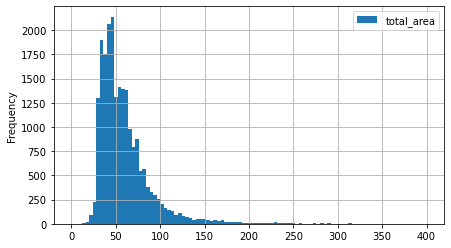

In [126]:
# total area
data.plot(y = 'total_area', kind = 'hist', bins = 100, grid=True, figsize = (7,4), range = (0,400))
data['total_area'].describe()

The data distribution is normal, there are outliers, but they may be due to the real state of affairs, as I wrote above,
and these emissions have no effect on the data. The maximum value of 900 m2 may well be,
like a duplex apartment. But still, most likely, this is a mistake, it should be 90. In general, the average area of the apartment is 62 m2, this is normal, the most common is a little less than 50, for Russia this is the norm, unfortunately. The minimum value of 12 meters is also suspicious, it should most likely be 120, but given the anomalous value of 900, the super low value helps to even out the average so that it does not creep into space.

<AxesSubplot:ylabel='Frequency'>

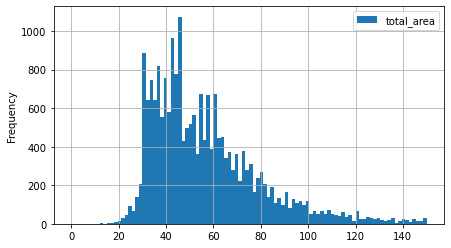

In [127]:
data.plot(y = 'total_area', kind = 'hist', bins = 100, grid=True, figsize = (7,4), range = (0,150))

count    21691.000000
mean        34.457375
std         22.048047
min          2.000000
25%         18.600000
50%         30.000000
75%         42.300000
max        409.700000
Name: living_area, dtype: float64

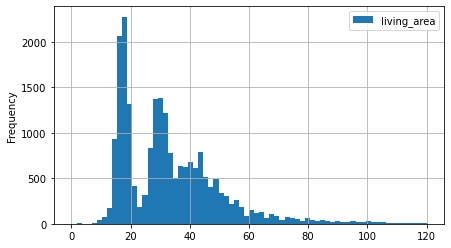

In [128]:
# living area
data.plot(y = 'living_area', kind = 'hist', bins = 70, grid=True, figsize = (7,4), range = (0,120))
data['living_area'].describe()


The distribution also looks normal (there is a second peak, I will describe it later), there is an increase in the direction of increase, most likely they forgot to put a decimal separator when entering, but this does not particularly affect the data, let's leave it as it is. There is also a small early peak just below 20 meters, but for Khrushchevs with one room of 17 meters this is also normal. A living area of 410 meters can exist given an apartment of 900 m2. 2 m2 square meters is clearly an error, apparently there are 20, but given the large values of 410 meters, such a small one can also be left for more correct averaging. An average value of 36 m2 seems to be correct, since most of the apartments are two-room. The most typical living area is just under 20 m2 and this is the norm.

count    20898.000000
mean        10.509512
std          5.842760
min          1.300000
25%          7.000000
50%          9.000000
75%         12.000000
max        112.000000
Name: kitchen_area, dtype: float64

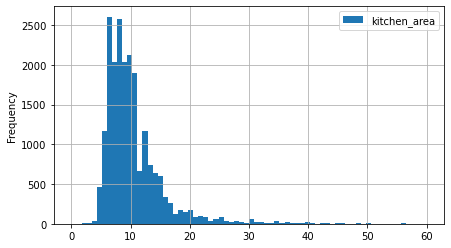

In [129]:
# kitchen
data.plot(y = 'kitchen_area', kind = 'hist', bins = 70, grid=True, figsize = (7,4), range = (0,60))
data['kitchen_area'].describe()

The distribution is normal. The maximum value of 112 meters is most likely an error, an average kitchen of 10 m2 is a direct hit. The minimum 1.3 m2 is clearly an error, it should be 13, again, given the large value, they cancel each other out.
In general, the distribution of cuisines as in life.

count    21691.000000
mean         6.499918
std         10.886704
min          0.012190
25%          3.450000
50%          4.650000
75%          6.750000
max        763.000000
Name: price, dtype: float64

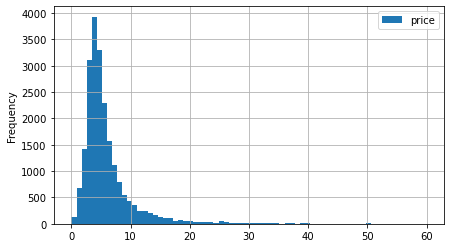

In [130]:
# prices
# prices are displayed in exponential format, for convenience we will divide everything by 1 million

data['price'] = data['last_price']/1000000
data.plot(y = 'price', kind = 'hist', bins = 70, grid=True, figsize = (7,4), range = (0,60))
data['price'].describe()


The minimum price of 12 thousand rubles is most likely a mistake, but again, in some remote village someone is trying to sell their old apartment without gas, heating and wallpaper. Anything is possible. everything else is the same as in life. Distribution is excellent

count    20898.000000
mean        10.509512
std          5.842760
min          1.300000
25%          7.000000
50%          9.000000
75%         12.000000
max        112.000000
Name: kitchen_area, dtype: float64

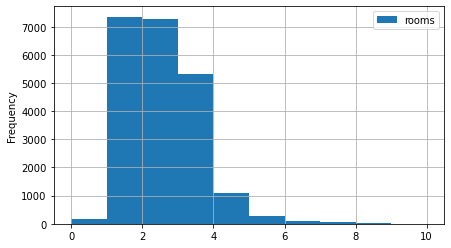

In [131]:
# rooms
data.plot(y = 'rooms', kind = 'hist', bins = 10, grid=True, figsize = (7,4), range = (0,10))
data['kitchen_area'].describe()

Google says (I'm not kidding) that the maximum value for the number of rooms in an apartment in St. Petersburg is 34 (officially). Proof - https://spb.gdeetotdom.ru/articles/1985863-2013-10-07-samyih-bolshih-kommunalnyih-kvartir-peterburga/ So 112 rooms are definitely not true)))) There are clearly either 11 or 12. The minimum value is 1.3 - some kind of error, the rooms are not divided. In general, in St. Petersburg there are a lot of multi-room apartments - communal apartments. The distribution is normal, most of the apartments are from 1 to 6 rooms, the most common value is 3 rooms. We leave it as is.

count    21691.000000
mean         2.607096
std          0.274294
min          2.400000
25%          2.400000
50%          2.500000
75%          2.700000
max          6.000000
Name: ceiling_height, dtype: float64

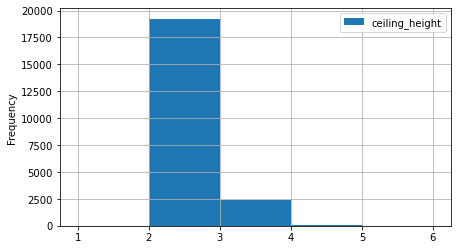

In [132]:
# ceiling height
data.plot(y = 'ceiling_height', kind = 'hist', bins = 5, grid=True, figsize = (7,4), range = (1,6))
data['ceiling_height'].describe()

The distribution is normal, the minimum and maximum values correspond to reality, the average is also ideal. There are such ceilings.

count    21691.000000
mean         5.876308
std          4.854922
min          1.000000
25%          2.000000
50%          4.000000
75%          8.000000
max         33.000000
Name: floor, dtype: float64

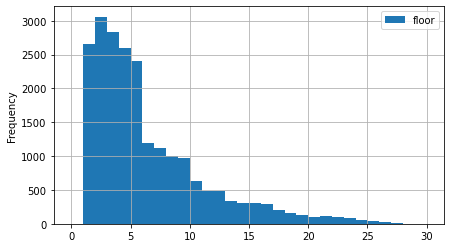

In [133]:
# floors
data.plot(y = 'floor', kind = 'hist', bins = 30, grid=True, figsize = (7,4), range = (0,30))
data['floor'].describe()

The distribution by floor number is normal, there are apartments on the ground floor, there are also apartments on a high floor. The middle floor is 5, the most common is 2.

<AxesSubplot:ylabel='floor_type'>

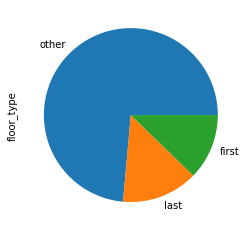

In [134]:
# floor type
(data['floor_type'].value_counts()).plot(kind = 'pie')

Most of the floors are between the first and last, the last floors are a little less, the first are the least.

count    21691.000000
mean        10.647504
std          6.567298
min          1.000000
25%          5.000000
50%          9.000000
75%         16.000000
max         60.000000
Name: floors_total, dtype: float64

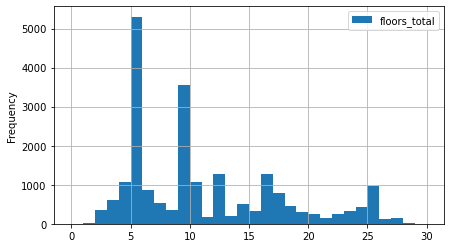

In [135]:
#floors amount
data.plot(y = 'floors_total', kind = 'hist', bins = 30, grid=True, figsize = (7,4), range = (0,30))
data['floors_total'].describe()

Распределение не похоже на нормальное, но это этажность домов, никакой корреляции между ними и не должно быть, что построили, то построили. Есть одноэтажные, в области, есть высотки. Самый высокий дом в Питере - 35 этажей. Так что максимальное значение - 60, это ошибка, должно быть 6 в том доме. Но на общее состояние это значение не влияет, так что оставим его.

count     21691.000000
mean     236195.848232
std      411821.309757
min         181.000000
25%       10934.000000
50%       14925.000000
75%       34044.000000
max      999999.000000
Name: cityCenters_nearest, dtype: float64

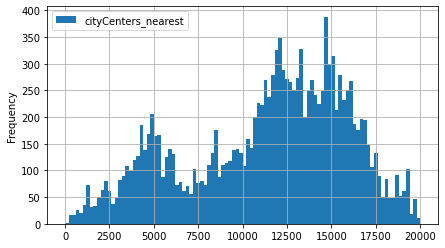

In [136]:
# city center nearest
data.plot(y = 'cityCenters_nearest', kind = 'hist', bins = 100, grid=True, figsize = (7,4), range = (0,20000))
data['cityCenters_nearest'].describe()

There are apartments right in the center of the city, there are on the outskirts, there are no secrets here. The maximum distance of 60 km is most likely indicated to the center of St. Petersburg from some house in a remote village, to the center of which it makes no sense to count.

count    16786.000000
mean     28776.090909
std      12659.465113
min          0.000000
25%      18518.000000
50%      26709.000000
75%      37242.000000
max      84869.000000
Name: airports_nearest, dtype: float64

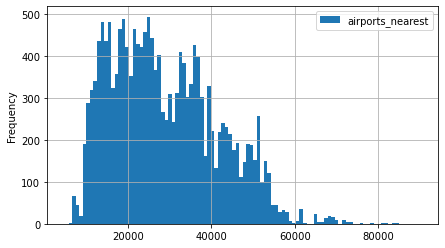

In [137]:
# airport nearest
data.plot(y = 'airports_nearest', kind = 'hist', bins = 100, grid=True, figsize = (7,4), range = (5000,90000))
data['airports_nearest'].describe()

The distribution is similar to normal with small prominent peaks, the building intensity is different. The airport in St. Petersburg and the area of 1 in total, Pulkovo, so large values \u200b\u200bare quite possible. And with a value of 0, this is clearly a mistake, there are no houses on the territory of the airport. The influence of this value on the overall distribution is negligible, we will not touch it.

count    21691.000000
mean       167.930893
std        305.155635
min          0.000000
25%          0.000000
50%          0.000000
75%        304.000000
max       3190.000000
Name: parks_nearest, dtype: float64

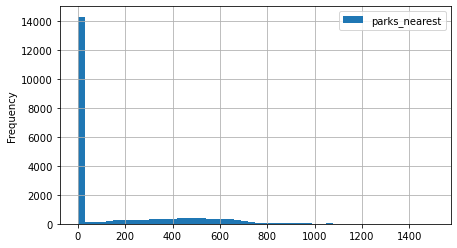

In [138]:
# parks neares
data.plot(y = 'parks_nearest', kind = 'hist', bins = 50, grid=True, figsize = (7,4), range = (0,1500))
data['parks_nearest'].describe()

The distribution here is absolutely abnormal, but it must be taken into account that there may not be a park 3 km from the house, so in this case 0 is explicitly indicated, hence such values. We will not remove them, otherwise there will be nothing to analyze at all. The rest of the distances are fine. Somewhere the park is closer, somewhere further. In the range of 400 - 600 meters, there are most apartment options.

<AxesSubplot:ylabel='Frequency'>

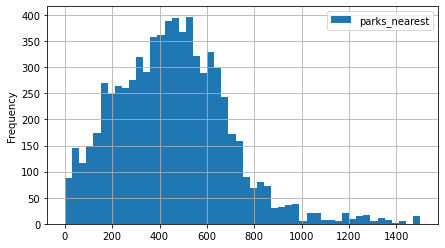

In [139]:
data.plot(y = 'parks_nearest', kind = 'hist', bins = 50, grid=True, figsize = (7,4), range = (1,1500))

<AxesSubplot:ylabel='Frequency'>

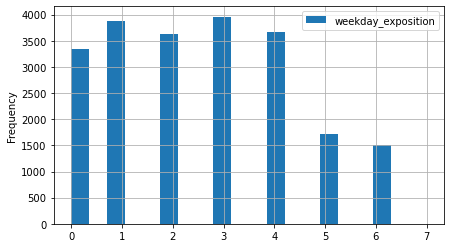

In [140]:
# day of publication
data.plot(y = 'weekday_exposition', kind = 'hist', bins = 20, grid=True, figsize = (7,4), range = (0,7))


There is nothing special here, most often they post ads on Tuesday and Thursday, least often on Sunday, apparently most of the ads are posted by realtors, and they have Sunday, basically, a day off.

<AxesSubplot:ylabel='Frequency'>

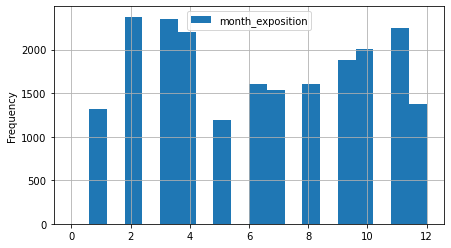

In [141]:
# month of publication
data.plot(y = 'month_exposition', kind = 'hist', bins = 20, grid=True, figsize = (7,4), range = (0,12))

Least of all ads are posted in summer, more in spring and autumn, not in vain they say - summer is a "dead" time for selling an apartment.

count    21691.000000
mean       159.399474
std        215.240249
min          0.000000
25%         21.000000
50%         77.000000
75%        204.000000
max       1580.000000
Name: days_exposition, dtype: float64

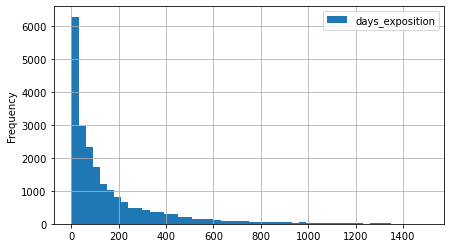

In [142]:
# days exposition
data.plot(y = 'days_exposition', kind = 'hist', bins = 50, grid=True, figsize = (7,4), range = (0,1500))
data['days_exposition'].describe()

<AxesSubplot:ylabel='Frequency'>

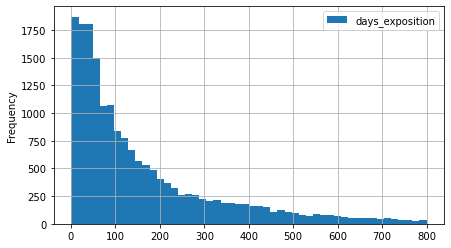

In [143]:
data.plot(y = 'days_exposition', kind = 'hist', bins = 50, grid=True, figsize = (7,4), range = (1,800))

<AxesSubplot:ylabel='Frequency'>

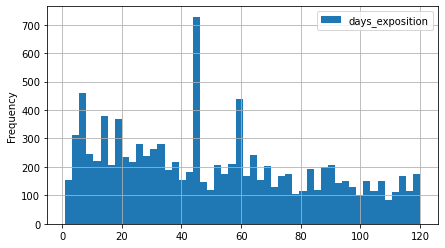

In [144]:
data.plot(y = 'days_exposition', kind = 'hist', bins = 50, grid=True, figsize = (7,4), range = (1,120))

The first histogram shows a Poisson distribution. There are apartments that were bought immediately (this is likely, but it is unlikely that in such a quantity), most likely either the data is not indicated, or an error. There is also a possibility that the apartment was put up for sale and immediately rented (perhaps automatically, perhaps manually). Therefore, I decided to remove the zero values and build a second chart.

count    18716.000000
mean       184.736803
std        221.386295
min          1.000000
25%         44.000000
50%        101.000000
75%        238.000000
max       1580.000000
Name: days_exposition, dtype: float64

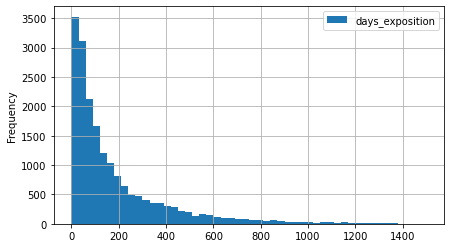

In [145]:
data[data['days_exposition']!=0].plot(
    y = 'days_exposition', 
    kind = 'hist', 
    bins = 50, 
    grid=True, 
    figsize = (7,4), 
    range = (1,1500))
data[data['days_exposition']!=0]['days_exposition'].describe()

All the same Poisson distribution, but without strange zero values. The minimum sale takes place in a day, today they put up, tomorrow the buyer called and took off, both the buyer and the seller were lucky. The maximum sale is 1580 days (almost 4.5 years), the question here is not that no one wanted to take this apartment, but that no one wanted to take it for the money that the seller asked for. Sometimes the seller is not in a hurry to sell, but at the same time he wants to get exactly the price that he set. Sooner or later, he will find the buyer who needs this particular apartment, no matter how much it costs.
The average duration of the sale is 184 days (six months), for the sale of such an object as an apartment, this is normal. You can also see that many more apartments are sold faster, the distribution clearly shows that as the time for selling an apartment increases, the frequency of such sales decreases.
The median on this distribution is 101 days, a little over 3 months, this is the real average sale time.

#### Let's study the factors that most affect the total (full) cost of the object.

0.6414794694644108

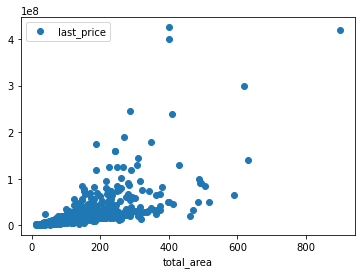

In [146]:
# total area
factor_area = data.pivot_table(index = 'total_area', values = 'last_price')
factor_area.plot(style = 'o')

data['total_area'].corr(data['last_price'])


The correlation between the total area of the apartment and the sale price is closer to 1, which means that the larger the area, the higher the cost of the apartment, which is confirmed by the diagram and common sense. At the same time, there are outliers, but they indicate that in some cases the high cost depends more on something else, and not on the area.

0.5664460965285397

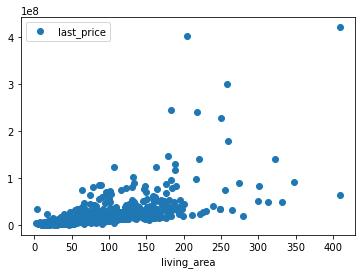

In [147]:
# living area
factor_living = data.pivot_table(index = 'living_area', values = 'last_price')
factor_living.plot(style = 'o')

data['living_area'].corr(data['last_price'])

The correlation between the living area of an apartment and the selling price is closer to 1 (as in the case of the total area), meaning the larger the living area, the higher the value of the apartment, which is confirmed by the diagram and again by common sense. At the same time, there are emissions, but they indicate that in some cases the high cost depends more on something else, and not on living space.

0.5179618041976903

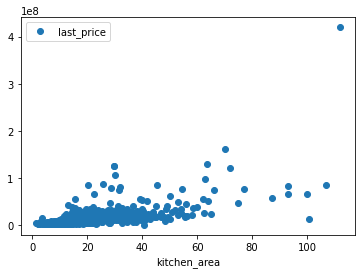

In [148]:
# kitchen
factor_kitchen = data.pivot_table(index = 'kitchen_area', values = 'last_price')
factor_kitchen.plot(style = 'o')

data['kitchen_area'].corr(data['last_price'])

In the case of the influence of the kitchen area on the cost of the apartment, the correlation is still high, but still, the influence of the kitchen size on the cost is less than the influence of the total and living areas.

0.36111212555461214

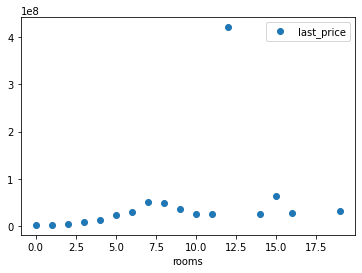

In [149]:
# rooms
factor_rooms = data.pivot_table(index = 'rooms', values = 'last_price')
factor_rooms.plot(style = 'o')

data['rooms'].corr(data['last_price'])

The influence of the number of rooms is even smaller than the influence of the kitchen area, it is quite minimal. There is a strange outlier on the diagram, but apparently there are some other parameters that affected the cost.

<AxesSubplot:xlabel='floor_type'>

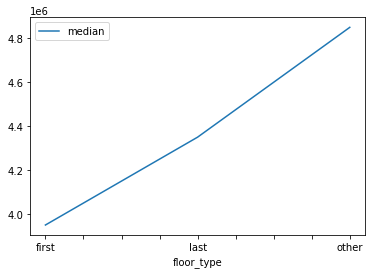

In [150]:
# floor type
factor_floor = data.pivot_table(index = 'floor_type', values = 'last_price', aggfunc = ['median'])
factor_floor.columns = ['median']
factor_floor.plot(y = 'median')

It is obvious that the most expensive apartments are between the first and the last floor, the cheapest ones on the first floor, the last ones are slightly more expensive than those on the first floor, but cheaper than those between them.

<AxesSubplot:xlabel='weekday_exposition'>

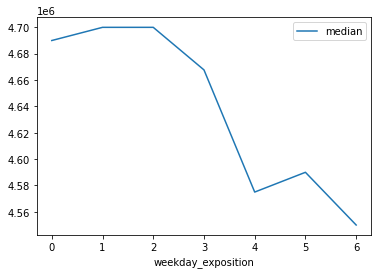

In [151]:
# weekday of exposition
factor_date = data.pivot_table(index = 'weekday_exposition', values = 'last_price', aggfunc = ['median'])
factor_date.columns = ['median']
factor_date.plot(y = 'median')


At the beginning of the week, the set price is significantly higher than at the end of the week, apparently this is due to the fact that at the beginning of the week people are still cheerful, they have a lot of strength and subconsciously they are ready to fight for big money. At the end of the week, tired people subconsciously think about how to quickly sell an apartment, albeit for less money.

<AxesSubplot:xlabel='month_exposition'>

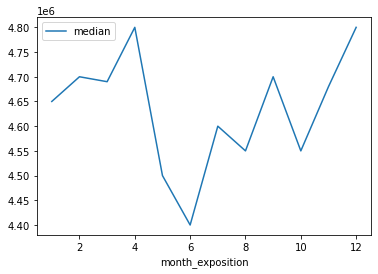

In [152]:
# month of exposition
factor_month = data.pivot_table(index = 'month_exposition', values = 'last_price', aggfunc = ['median'])
factor_month.columns = ['median']
factor_month.plot(y = 'median')

Apparently, there is no dependence of the cost of the apartment on the month it is put up for sale. And what would she do?Судя по всему никакой зависимости стоимости квартиры от месяца выставления ее на продажу нет. И с чего бы ей взяться?

<AxesSubplot:xlabel='year_exposition'>

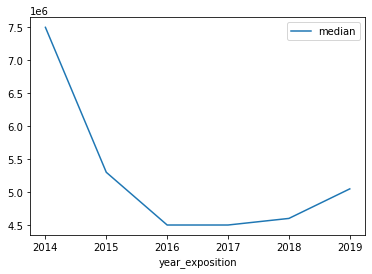

In [153]:
# year of exposition
factor_year = data.pivot_table(index = 'year_exposition', values = 'last_price', aggfunc = ['median'])
factor_year.columns = ['median']
factor_year.plot(y = 'median')

The highest cost of apartments was in 2014, then it began to decline. Most likely this is due to the increase in the number of new buildings. More offers on the market - less price of one offer. By 2019, banks lowered mortgage rates and demand began to grow again, the higher the demand, the higher the price, with the supply unchanged.

<AxesSubplot:xlabel='year_exposition'>

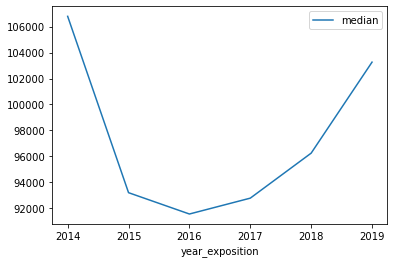

In [154]:
# price changing
factor_year_meter = data.pivot_table(index = 'year_exposition', values = 'price_square_meter', aggfunc = ['median'])
factor_year_meter.columns = ['median']
factor_year_meter.plot(y = 'median')

<AxesSubplot:xlabel='year_exposition'>

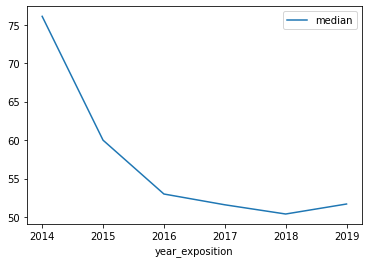

In [155]:
# consider the dynamics of changes in the area sold by years
factor_year_square = data.pivot_table(index = 'year_exposition', values = 'total_area', aggfunc = ['median'])
factor_year_square.columns = ['median']
factor_year_square.plot(y = 'median')

Based on the results of the three graphs, we can conclude that from 2014 to 2018, the area of apartments for sale fell sharply, and with it, at first, the price also fell, but after 2016, the price per 1 m2 began to grow, despite the fact that the area of apartments for sale did not increase, hence the increase in the total cost of apartments, since the cost of an apartment is equal to the product of the cost of 1 m2 by the number of m2 in the apartment.

#### Conclusion about cost

The largest influence (of the factors proposed for the study) is the total area of ​​the apartment, the living area and the kitchen area have a slightly smaller influence. As well as the floor type. The day and month of the ad placement do not particularly affect, but the year already has a stronger effect, here you need to look at the general housing market.

#### Average price of one square meter in 10 settlements with the largest number of ads.

In [156]:
price_locality = data.pivot_table(index = 'locality_name', values = 'price_square_meter', aggfunc=['count', 'median'])
price_locality.columns = ['count', 'price_median']
price_locality = price_locality.sort_values('count', ascending = False).head(10)
price_locality

,count,price_median
locality_name,,
санкт-петербург,14527,104500.0
мурино,524,86842.0
кудрово,422,96052.0
шушары,403,77352.0
всеволожск,371,65789.0
пушкин,345,100000.0
колпино,328,74723.5
парголово,301,91642.0
гатчина,292,67745.5


In [157]:
#highest cost
price_locality[price_locality['price_median'] == price_locality['price_median'].max()]

,count,price_median
locality_name,,
санкт-петербург,14527,104500.0


In [158]:
#lowest cost
price_locality[price_locality['price_median'] == price_locality['price_median'].min()]

,count,price_median
locality_name,,
всеволожск,371,65789.0


Of the ten locations with the highest number of ads, the highest cost per meter is in St. Petersburg, and the lowest in Vsevolozhsk.

#### Average price per kilometer distance from the center in St. Petersburg

,last_price
cityCenter_km,
0,23.827989
1,19.136761
2,16.522830
3,13.217394
4,13.047033
5,14.923835
6,13.395418
7,13.015436
8,8.387174


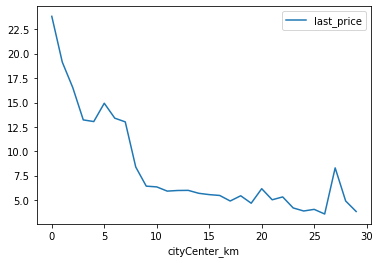

In [162]:
# convert the values of kilometers to integers
data['cityCenter_km'] = data['cityCenter_km'].astype('int')

# select the data for St. Petersburg in a separate table, 
#immediately cut off the distances from the center, which used to be NaN
price_spb = data.query('locality_name == "санкт-петербург" and cityCenter_km !=999')

# divide all prices for apartments by 1 million rubles for clarity
price_spb['last_price'] = price_spb['last_price'] / 1000000

# make a summary table of the average price of an apartment from the distance from the center in kilometers
price_km = price_spb.pivot_table(index = 'cityCenter_km', values = 'last_price', aggfunc = 'mean')

# see this table and graph
price_km.plot()
price_km

It can be seen from the table and diagram that the farther from the center, the cheaper apartments are, with the main drop occurring in the first 10 km from the center.

### General conclusion

During the processing of the data array, missing values were removed or changed, and strong lunges were removed or changed. The following parameters were studied and described: total area, living area, kitchen area, object price, number of rooms, ceiling height, apartment floor; floor type of the apartment (“first”, “last”, “other”); the total number of floors in the house, the distance to the city center in meters, the distance to the nearest airport, the distance to the nearest park, the day and month the announcement was published.
    It was studied how quickly the apartments were sold, while it was hypothesized that the time of sale of an apartment equal to 0 most likely means that the apartment was withdrawn from sale immediately after being put up for one reason or another. Therefore, further studies on the timing of the sale were carried out without such apartments. It turned out that 75% of apartments are sold in 238 days.
    Further, it was revealed that the total area of the apartment has the greatest influence on the cost of an apartment, the living area and kitchen area, as well as the type of floor, have a slightly less influence. The day and month of the ad placement do not particularly affect the cost, but the year already has a stronger effect, since the housing market as a whole has a strong influence. The highest cost of apartments was in 2014, then it began to decline. Most likely this is due to the increase in the number of new buildings. More offers on the market - less price of one offer. It was concluded that from 2014 to 2018 the area of ​​apartments for sale fell sharply, and with it, at first, the price also fell, but after 2016 the price per 1 m2 began to grow, despite the fact that the area of apartments for sale did not increase, hence and an increase in the total cost of apartments, since the cost of an apartment is equal to the product of the cost of 1 m2 and the number of m2 in the apartment.
    In addition, it was revealed that out of 10 cities in which there are the most advertisements for the sale of apartments, the most expensive apartments are in St. Petersburg (average price - 114.2 thousand rubles per square meter of housing), and the cheapest - in Vsevolozhsk ( 65.7 thousand per square meter).
    And at the very end, a study was conducted of the dependence of the fall in the average cost of housing with a distance from the center of St. Petersburg for each km. Up to the first 10 km, the cost drops rapidly, most likely there are the most beautiful houses with the highest ceilings, and then the fall becomes not so fast. But at the end, after the 25th km, a jump is also visible, apparently due to the fact that at a distance of more than 25 km from the center of St. Petersburg there are many new tracks, the price of which is obviously higher than in the secondary.